In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 1.加载数据

In [7]:
digits = pd.read_csv("data/digit recognizor.csv")

In [8]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [9]:
digits

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Y = digits.iloc[:, 0]
X = digits.iloc[:, 1:]
# 数据量
X.shape

(42000, 784)

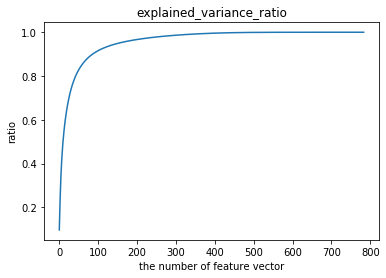

In [13]:
# 绘制累计方差贡献率
pca_line = PCA().fit(X)
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.ylabel("ratio")
plt.xlabel("the number of feature vector")
plt.title("explained_variance_ratio")
plt.savefig("./imgs/特征选择.png")
plt.show()

In [ ]:
pca_line.get_covariance().shape

#### 使用随机僧林进行模型的评估

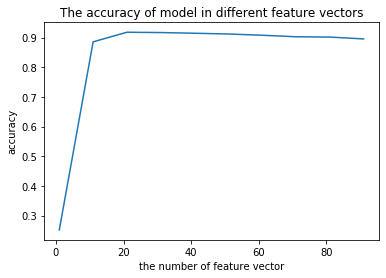

In [12]:
# 使用降维后的数据进行特征向量的选择和模型的评估
score = []

for i in range(1, 101, 10):
    X_dir = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10
                            , random_state=10)
                        , X_dir
                        , Y
                        , cv=5).mean()
    score.append(once)

# 画学习曲线
plt.plot(range(1, 101, 10), score)
plt.ylabel("accuracy")
plt.xlabel("the number of feature vector")
plt.title("The accuracy of model in different feature vectors")
plt.savefig("./imgs/RFC.png")
plt.show()

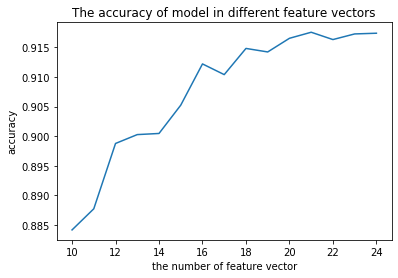

In [14]:
# 细化特征维数，选择更加精确到降维维度
score = []

for i in range(10, 25):
    X_dir = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10
                            , random_state=10)
                        , X_dir
                        , Y
                        , cv=5).mean()
    score.append(once)

# 画学习曲线
plt.plot(range(10, 25), score)
plt.ylabel("accuracy")
plt.xlabel("the number of feature vector")
plt.title("The accuracy of model in different feature vectors")
plt.savefig("./imgs/精确调节.png")
plt.show()

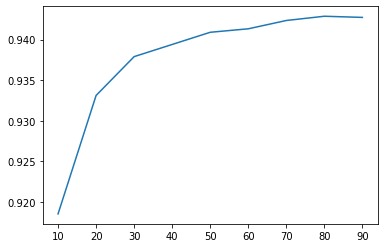

In [43]:
# 确定模型参数 选择最佳的 n_estimators 数量
score = []

X_dir = PCA(n_components=21).fit_transform(X)

for i in range(10, 100, 10):
    rfc = RFC(n_estimators=i, random_state=10)
    score.append(cross_val_score(rfc, X_dir, Y, cv=5).mean())
    
plt.plot(range(10, 100, 10), score)
plt.show()
# print("Score : {}".format(score))

In [44]:
rfc = RFC(n_estimators=100, random_state=10)
score = cross_val_score(rfc, X_dir, Y, cv=5).mean()
print("Score : {}".format(score))

Score : 0.9430240579036873


In [15]:
rfc = RFC(n_estimators=100, random_state=10)
score = cross_val_score(rfc, X, Y, cv=5).mean()
print("Score : {}".format(score))

Score : 0.9641429333681589


#### 换模型进行评估　KNN（前提：使用PCA使得数据的特征减少）

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cross_val_score(knn, X_dir, Y, cv=5).mean()

0.9676186909005946

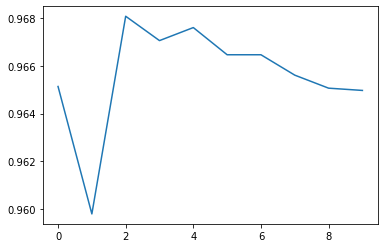

In [49]:
# 对knn进行调参
score = []

for i in range(10):
    score.append(cross_val_score(KNeighborsClassifier(i+1)
                                 , X_dir
                                 , Y
                                 , cv=5).mean()
                )
plt.figure(figsize = (12, 6))
plt.plot(range(10), score)
plt.title("The accuracy of KNN")
plt.show()

In [52]:
# 确定参数
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, X_dir, Y, cv=5).mean()

0.9680947112844281